# Dataset - 3
## Loan Default Prediction
## Logistic regression using Scikit learn and Stats module

In [1]:
import pandas as pd

df = pd.read_csv(r'C:\Users\Admin\Desktop\Datasets\Loan Default Prediction.csv')

print(df.head())
print(df.shape)

   person_age  person_income person_home_ownership  person_emp_length  \
0          22          59000                  RENT              123.0   
1          21           9600                   OWN                5.0   
2          25           9600              MORTGAGE                1.0   
3          23          65500                  RENT                4.0   
4          24          54400                  RENT                8.0   

  loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
0    PERSONAL          D      35000          16.02            1   
1   EDUCATION          B       1000          11.14            0   
2     MEDICAL          C       5500          12.87            1   
3     MEDICAL          C      35000          15.23            1   
4     MEDICAL          C      35000          14.27            1   

   loan_percent_income cb_person_default_on_file  cb_person_cred_hist_length  
0                 0.59                         Y                           3  


In [2]:
print(df.describe())

         person_age  person_income  person_emp_length     loan_amnt  \
count  32581.000000   3.258100e+04       31686.000000  32581.000000   
mean      27.734600   6.607485e+04           4.789686   9589.371106   
std        6.348078   6.198312e+04           4.142630   6322.086646   
min       20.000000   4.000000e+03           0.000000    500.000000   
25%       23.000000   3.850000e+04           2.000000   5000.000000   
50%       26.000000   5.500000e+04           4.000000   8000.000000   
75%       30.000000   7.920000e+04           7.000000  12200.000000   
max      144.000000   6.000000e+06         123.000000  35000.000000   

       loan_int_rate   loan_status  loan_percent_income  \
count   29465.000000  32581.000000         32581.000000   
mean       11.011695      0.218164             0.170203   
std         3.240459      0.413006             0.106782   
min         5.420000      0.000000             0.000000   
25%         7.900000      0.000000             0.090000   
50%   

In [3]:
# Shape of the dataset
print(df.shape)


(32581, 12)


In [4]:

# List columns
print(df.columns.tolist())

# Types 
print(df.dtypes)

['person_age', 'person_income', 'person_home_ownership', 'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt', 'loan_int_rate', 'loan_status', 'loan_percent_income', 'cb_person_default_on_file', 'cb_person_cred_hist_length']
person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object


In [5]:
# Check for missing values
missing_values = df.isnull().sum()

# missing values for each column
print("Missing values ")
print(missing_values)


Missing values 
person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64


In [6]:
# missing values with mean
df['person_emp_length'].fillna(df['person_emp_length'].mean(), inplace=True)
df['loan_int_rate'].fillna(df['loan_int_rate'].mean(), inplace=True)

print(df.isnull().sum())


person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64


In [7]:
# Check for duplicate rows
duplicate_rows = df.duplicated()

num_duplicate_rows = duplicate_rows.sum()

print("Number of duplicate rows   ", num_duplicate_rows)



Number of duplicate rows    165


In [8]:
# Remove duplicate rows
df.drop_duplicates(inplace=True)

print("Number of duplicate rows", df.duplicated().sum())


Number of duplicate rows 0


In [9]:

print(df.shape)

(32416, 12)


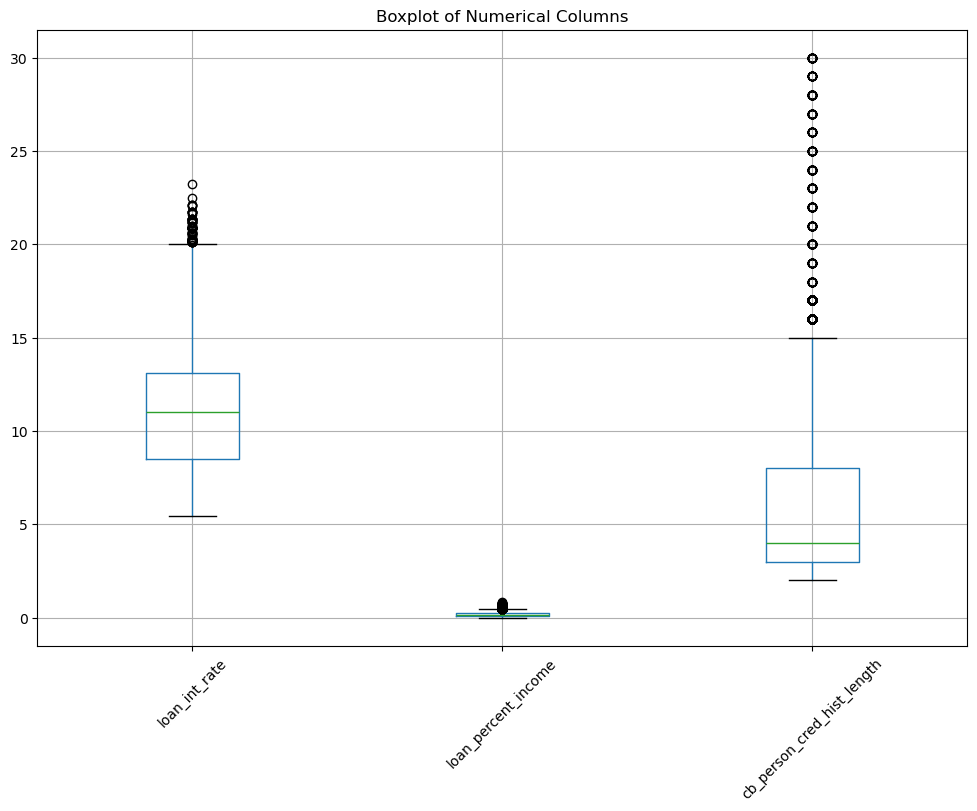

loan_int_rate                   70
loan_percent_income            650
cb_person_cred_hist_length    1139
dtype: int64


In [10]:
# Importing libraries
import matplotlib.pyplot as plt

numerical_columns = [ 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']

# box plots 
plt.figure(figsize=(12, 8))
df[numerical_columns].boxplot()
plt.title('Boxplot of Numerical Columns')
plt.xticks(rotation=45)
plt.show()

# IQR 
Q1 = df[numerical_columns].quantile(0.25)
Q3 = df[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

# Check for outliers using IQR
outliers = ((df[numerical_columns] < (Q1 - 1.5 * IQR)) | (df[numerical_columns] > (Q3 + 1.5 * IQR))).sum()
print(outliers)


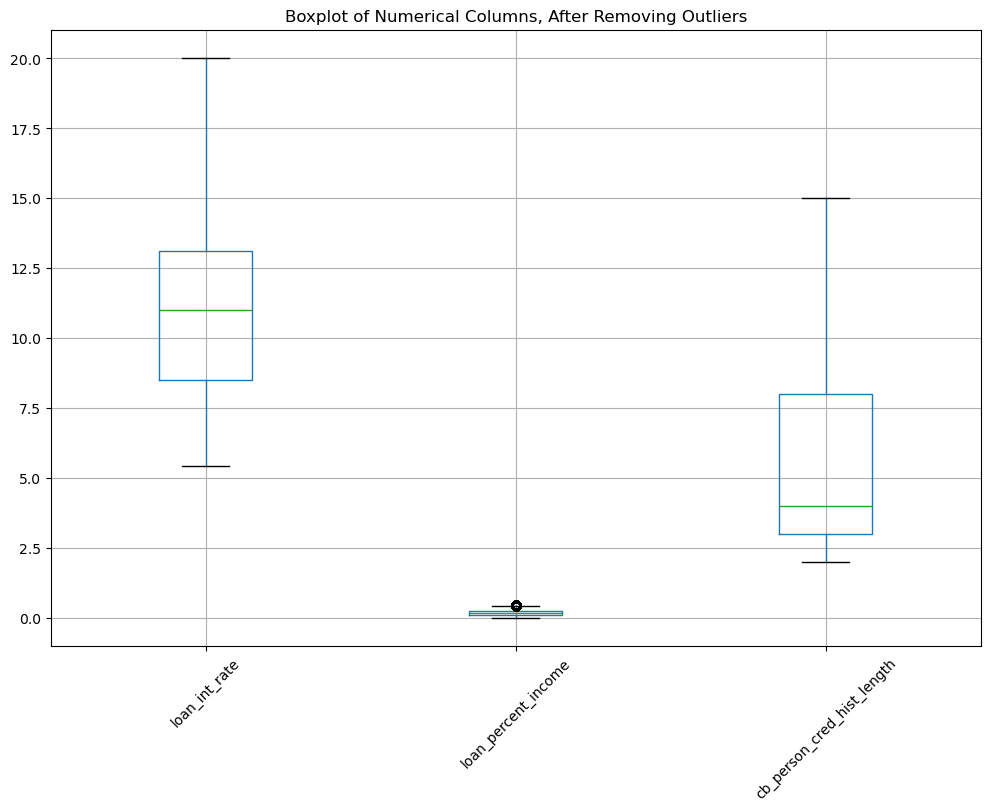

(30580, 12)


In [11]:
# Remove outliers 
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

for column in numerical_columns:
    df = df[(df[column] >= lower_bound[column]) & (df[column] <= upper_bound[column])]

# Visualize 
plt.figure(figsize=(12, 8))
df[numerical_columns].boxplot()
plt.title('Boxplot of Numerical Columns, After Removing Outliers')
plt.xticks(rotation=45)
plt.show()

print( df.shape)


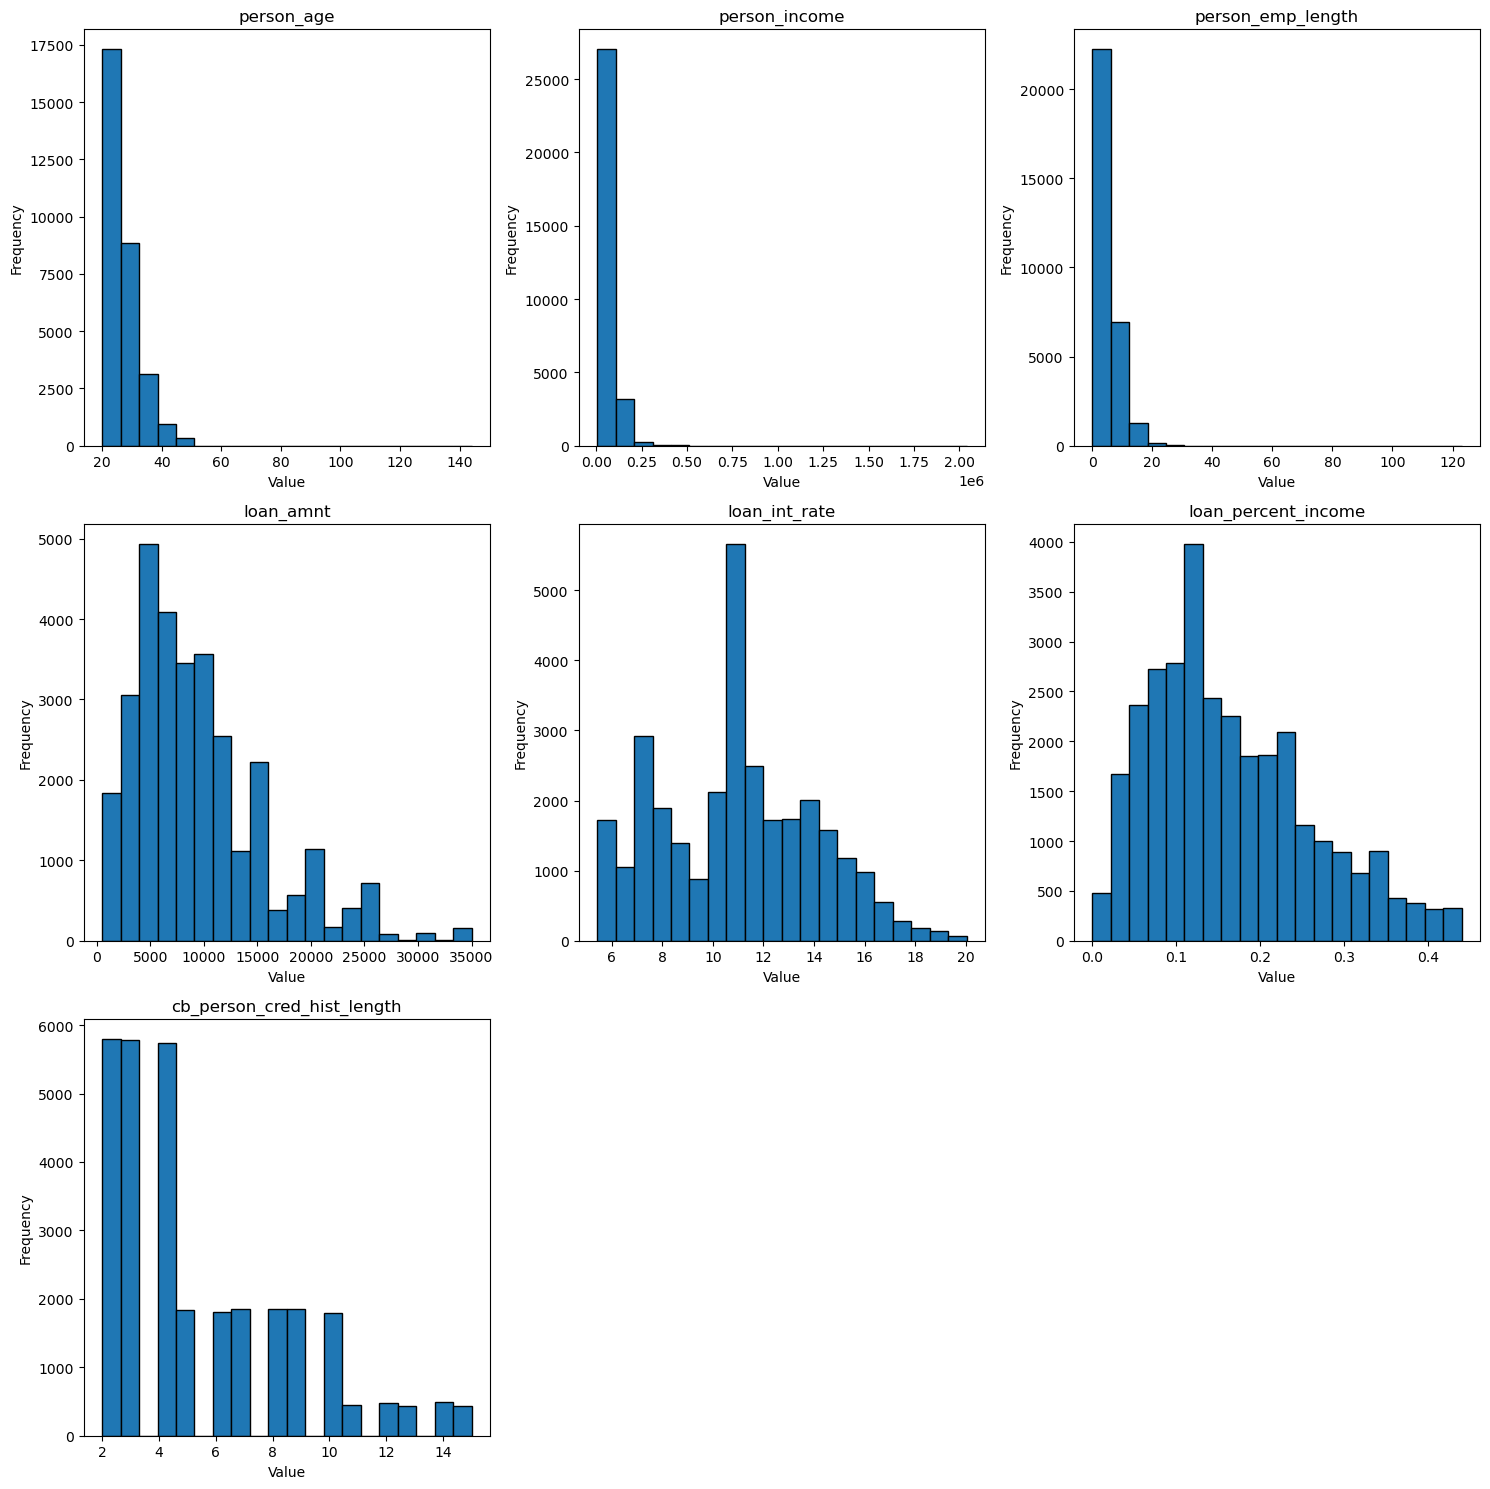

In [12]:
import matplotlib.pyplot as plt

numerical_columns = ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 
                     'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']

# Plot histograms 
plt.figure(figsize=(15, 15))

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    df[column].hist(bins=20, edgecolor='black', grid=False)
    plt.title(column)
    plt.xlabel('Value')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


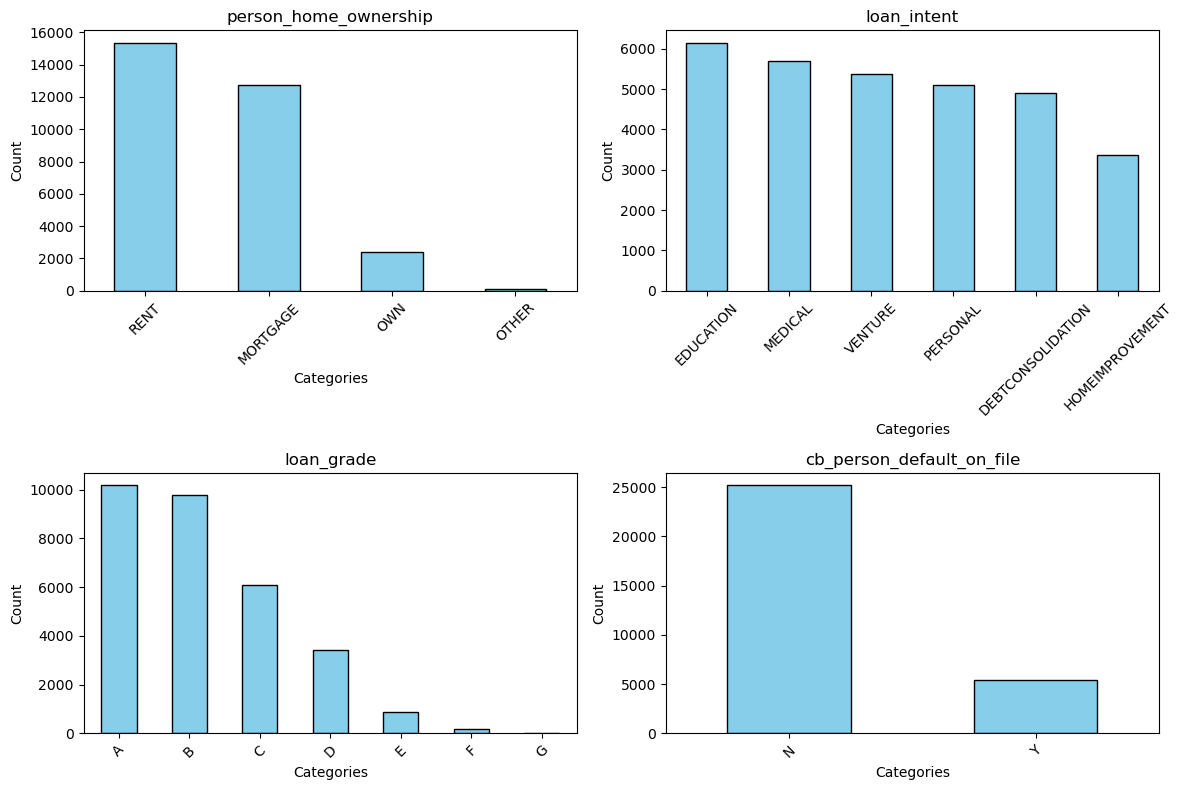

In [13]:
# Visualize categorical variables
categorical_columns = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']

plt.figure(figsize=(12, 8))

# bar plots 
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(2, 2, i)
    df[column].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title(column)
    plt.xlabel('Categories')
    plt.ylabel('Count')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [14]:
# Total number of variables
total_variables = len(df.columns)
print("Total variables", total_variables)

print(df.columns)


Total variables 12
Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')


In [15]:
# One hot encoding 
categorical_columns = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']

# Apply one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_columns)

# Display the resulting DataFrame
print(df_encoded.head())


   person_age  person_income  person_emp_length  loan_amnt  loan_int_rate  \
1          21           9600                5.0       1000          11.14   
5          21           9900                2.0       2500           7.14   
7          24          78956                5.0      35000          11.11   
8          24          83000                8.0      35000           8.90   
9          21          10000                6.0       1600          14.74   

   loan_status  loan_percent_income  cb_person_cred_hist_length  \
1            0                 0.10                           2   
5            1                 0.25                           2   
7            1                 0.44                           4   
8            1                 0.42                           2   
9            1                 0.16                           3   

   person_home_ownership_MORTGAGE  person_home_ownership_OTHER  ...  \
1                           False                        False 

In [16]:
# DataFrame after one-hot encoding
encoded_columns = df_encoded.columns.tolist()

print(encoded_columns)


['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_status', 'loan_percent_income', 'cb_person_cred_hist_length', 'person_home_ownership_MORTGAGE', 'person_home_ownership_OTHER', 'person_home_ownership_OWN', 'person_home_ownership_RENT', 'loan_intent_DEBTCONSOLIDATION', 'loan_intent_EDUCATION', 'loan_intent_HOMEIMPROVEMENT', 'loan_intent_MEDICAL', 'loan_intent_PERSONAL', 'loan_intent_VENTURE', 'loan_grade_A', 'loan_grade_B', 'loan_grade_C', 'loan_grade_D', 'loan_grade_E', 'loan_grade_F', 'loan_grade_G', 'cb_person_default_on_file_N', 'cb_person_default_on_file_Y']


In [17]:
print(df_encoded)

       person_age  person_income  person_emp_length  loan_amnt  loan_int_rate  \
1              21           9600                5.0       1000          11.14   
5              21           9900                2.0       2500           7.14   
7              24          78956                5.0      35000          11.11   
8              24          83000                8.0      35000           8.90   
9              21          10000                6.0       1600          14.74   
...           ...            ...                ...        ...            ...   
32290          37          90000               11.0       4000           6.62   
32292          38         200000                0.0       3000           7.68   
32293          38         110000                5.0      16000          11.99   
32294          36          92000               18.0       4000           7.29   
32295          42         101000                6.0      25000          16.15   

       loan_status  loan_pe

In [18]:
# Convert columns to numerical
boolean_columns = ['person_home_ownership_MORTGAGE', 'person_home_ownership_OTHER',
                'person_home_ownership_OWN', 'person_home_ownership_RENT',
                   'loan_intent_DEBTCONSOLIDATION', 'loan_intent_EDUCATION',
                     'loan_intent_HOMEIMPROVEMENT', 'loan_intent_MEDICAL',
                       'loan_intent_PERSONAL', 'loan_intent_VENTURE',
                  'loan_grade_A', 'loan_grade_B', 'loan_grade_C', 'loan_grade_D',
                    'loan_grade_E', 'loan_grade_F', 'loan_grade_G',
                   'cb_person_default_on_file_N', 'cb_person_default_on_file_Y']

df_encoded[boolean_columns] = df_encoded[boolean_columns].astype(int)

print(df_encoded.head())


   person_age  person_income  person_emp_length  loan_amnt  loan_int_rate  \
1          21           9600                5.0       1000          11.14   
5          21           9900                2.0       2500           7.14   
7          24          78956                5.0      35000          11.11   
8          24          83000                8.0      35000           8.90   
9          21          10000                6.0       1600          14.74   

   loan_status  loan_percent_income  cb_person_cred_hist_length  \
1            0                 0.10                           2   
5            1                 0.25                           2   
7            1                 0.44                           4   
8            1                 0.42                           2   
9            1                 0.16                           3   

   person_home_ownership_MORTGAGE  person_home_ownership_OTHER  ...  \
1                               0                            0 

In [19]:
from sklearn.preprocessing import MinMaxScaler

# numerical columns for normalization
numerical_columns = ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 
                     'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']

#  MinMaxScaler
scaler = MinMaxScaler()

df_encoded[numerical_columns] = scaler.fit_transform(df_encoded[numerical_columns])

print(df_encoded.head())


   person_age  person_income  person_emp_length  loan_amnt  loan_int_rate  \
1    0.008065       0.002712           0.040650   0.014493       0.391513   
5    0.008065       0.002859           0.016260   0.057971       0.117728   
7    0.032258       0.036781           0.040650   1.000000       0.389459   
8    0.032258       0.038768           0.065041   1.000000       0.238193   
9    0.008065       0.002908           0.048780   0.031884       0.637919   

   loan_status  loan_percent_income  cb_person_cred_hist_length  \
1            0             0.227273                    0.000000   
5            1             0.568182                    0.000000   
7            1             1.000000                    0.153846   
8            1             0.954545                    0.000000   
9            1             0.363636                    0.076923   

   person_home_ownership_MORTGAGE  person_home_ownership_OTHER  ...  \
1                               0                            0 

In [20]:
from sklearn.model_selection import train_test_split

# Split dataset
X = df_encoded.drop('loan_status', axis=1)  # Features (all columns except 'loan_status')
y = df_encoded['loan_status']  # Target variable

# Split the dataset into 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Training set shape   ", X_train.shape, y_train.shape)
print("Testing set shape    ", X_test.shape, y_test.shape)


Training set shape    (21406, 26) (21406,)
Testing set shape     (9174, 26) (9174,)


In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# logistic regression model
log_reg = LogisticRegression(random_state=42)

# Fit the model on the training data
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy   ", accuracy)
print("Precision  ", precision)
print("Recall  ", recall)
print("F1-score    ", f1)


Accuracy    0.8673424896446479
Precision   0.7566947207345065
Recall   0.5238347457627118
F1-score     0.6190923317683881


In [22]:
import statsmodels.api as sm

X_train_const = sm.add_constant(X_train)

# Fit logistic regression model
logit_model = sm.Logit(y_train, X_train_const)
logit_result = logit_model.fit()

X_test_const = sm.add_constant(X_test)
y_pred = logit_result.predict(X_test_const)

# binary predictions (0 or 1)
y_pred_binary = [1 if pred > 0.5 else 0 for pred in y_pred]

# Evaluate the model
from sklearn.metrics import accuracy_score, classification_report

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_binary)
print("Accuracy   ", accuracy)

# Classification report
print("Classification Report  ")
print(classification_report(y_test, y_pred_binary))

print(logit_result.summary())

Optimization terminated successfully.
         Current function value: 0.339151
         Iterations 8
Accuracy    0.868323522999782
Classification Report  
              precision    recall  f1-score   support

           0       0.89      0.96      0.92      7286
           1       0.76      0.53      0.62      1888

    accuracy                           0.87      9174
   macro avg       0.82      0.74      0.77      9174
weighted avg       0.86      0.87      0.86      9174

                           Logit Regression Results                           
Dep. Variable:            loan_status   No. Observations:                21406
Model:                          Logit   Df Residuals:                    21383
Method:                           MLE   Df Model:                           22
Date:                Fri, 10 May 2024   Pseudo R-squ.:                  0.3348
Time:                        09:01:39   Log-Likelihood:                -7259.9
converged:                       True   LL-